In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
movies_df = pd.read_csv(r'TMDB.csv')
movies_df.info()
movies_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   movie_id              10000 non-null  int64  
 2   title                 10000 non-null  object 
 3   overview              9915 non-null   object 
 4   keywords              10000 non-null  object 
 5   genres                10000 non-null  object 
 6   release_date          9977 non-null   object 
 7   original_language     10000 non-null  object 
 8   original_title        10000 non-null  object 
 9   production_companies  10000 non-null  object 
 10  revenue               10000 non-null  int64  
 11  status                10000 non-null  object 
 12  tagline               7320 non-null   object 
 13  spoken_languages      10000 non-null  object 
 14  runtime               10000 non-null  int64  
 15  budget              

,Unnamed: 0,movie_id,title,overview,keywords,genres,release_date,original_language,original_title,production_companies,...,spoken_languages,runtime,budget,vote_count,vote_average,popularity,adult_tf,poster_path,cast,crew
0,1,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'id': 878, 'name': 'Science Fiction'}, {'id'...",2022-12-14,en,Avatar: The Way of Water,"[{'id': 574, 'logo_path': '/iB6GjNVHs5hOqcEYt2...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",192,460000000,3655,7.711,4549.057,False,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,"[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn..."
1,2,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[{'id': 703, 'name': 'detective'}, {'id': 1200...","[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",2022-11-23,en,Glass Onion: A Knives Out Mystery,"[{'id': 37871, 'logo_path': '/lZW4kQSSLFldUpjj...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",140,40000000,2204,7.083,3609.063,False,/vDGr1YdrlfbU9wxTOdpf3zChmv9.jpg,"[{'adult': False, 'gender': 2, 'id': 8784, 'kn...","[{'adult': False, 'gender': 2, 'id': 1226, 'kn..."
2,3,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",2022-11-30,en,Violent Night,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",112,20000000,805,7.742,3283.632,False,/nhXjUvOvq7rJlvJFCrZMUUJ9Mn0.jpg,"[{'adult': False, 'gender': 2, 'id': 35029, 'k...","[{'adult': False, 'gender': 2, 'id': 6114, 'kn..."
3,4,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",2005-12-07,en,"The Chronicles of Narnia: The Lion, the Witch ...","[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",143,180000000,9108,7.108,3057.713,False,/iREd0rNCjYdf5Ar0vfaW32yrkm.jpg,"[{'adult': False, 'gender': 2, 'id': 5527, 'kn...","[{'adult': False, 'gender': 2, 'id': 1095, 'kn..."
4,5,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[{'id': 952, 'name': 'lightning'}, {'id': 2095...","[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",2022-10-19,en,Black Adam,"[{'id': 12, 'logo_path': '/iaYpEp3LQmb8AfAtmTv...",...,"[{'english_name': 'Arabic', 'iso_639_1': 'ar',...",125,200000000,3544,7.216,2590.202,False,/pFlaoHTZeyNkG83vxsAJiGzfSsa.jpg,"[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 3687, 'kn..."


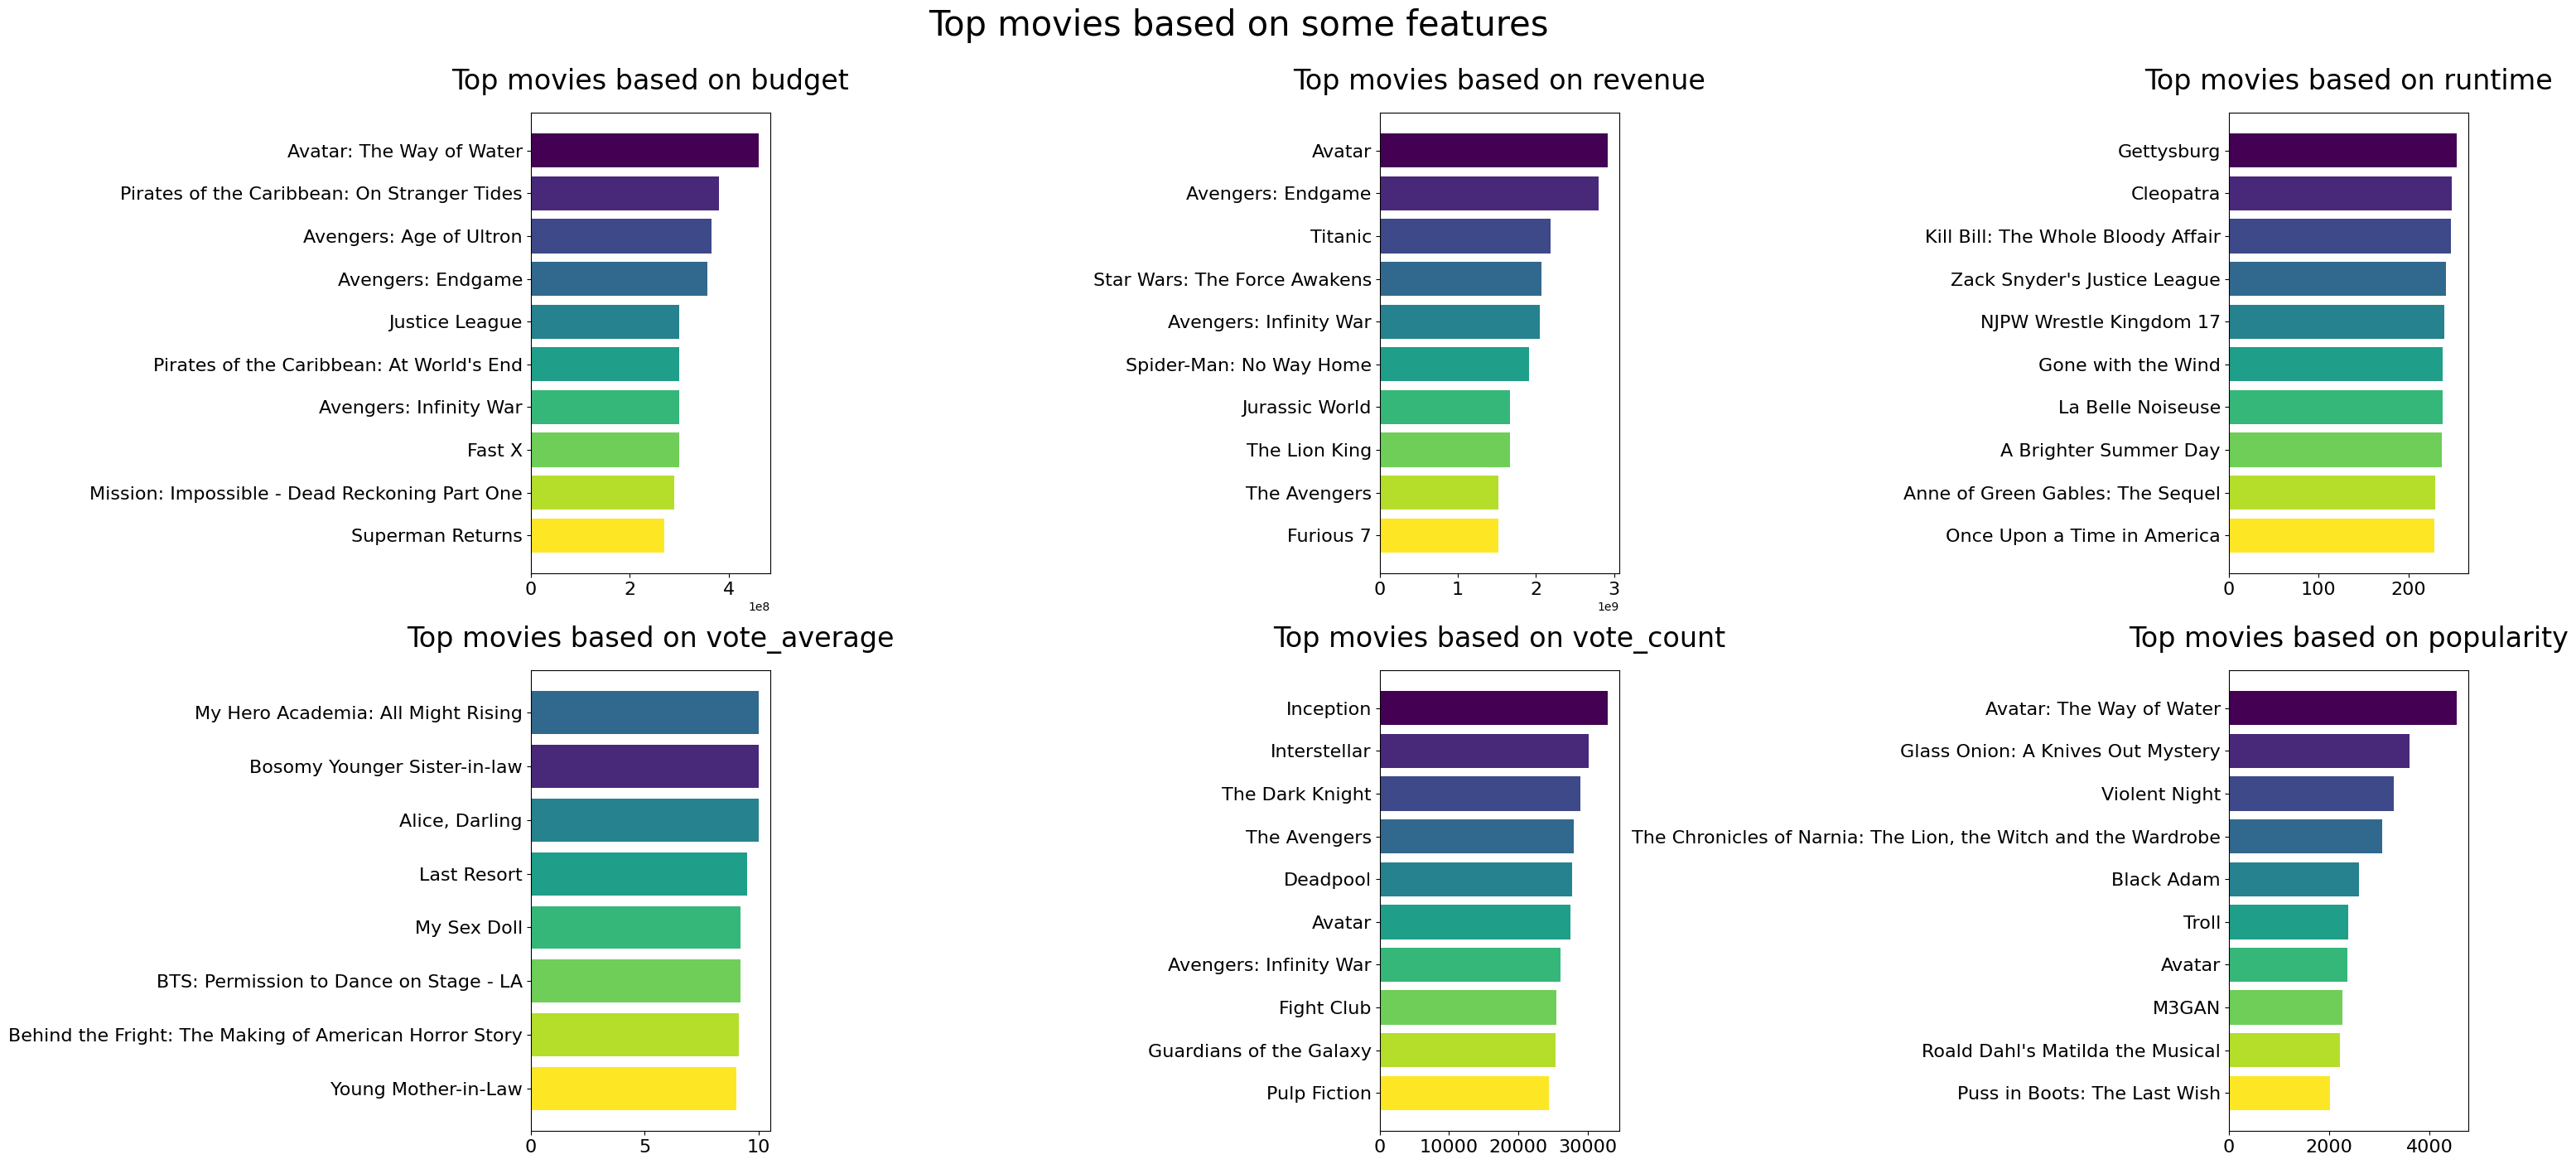

In [132]:
import matplotlib
import matplotlib.pyplot as plt

# Number of top movies to be plotted
top_movie_num = 10

# Features to plot the top movies based on
top_movies_based_on = ["budget", "revenue", "runtime", "vote_average", "vote_count", "popularity"]

# Create a figure and axes object for subplots
fig, ax = plt.subplots(len(top_movies_based_on)//3, 3, figsize=(30,14))

# Define a color map with `top_movie_num` colors
colors = plt.cm.get_cmap('viridis', top_movie_num)

# Iterate through each feature and plot top movies based on that feature
for i, col in enumerate(top_movies_based_on):
    # Get top `top_movie_num` movies based on `col` feature
    top_movies_by = movies_df.sort_values(by=[col], ascending=False).head(top_movie_num)

    # Calculate row and column number for subplot
    r, c = i//3, i%3

    # Plot top movies as horizontal bar chart in subplot
    ax[r][c].barh(top_movies_by["title"], top_movies_by[col], color=colors.colors)

    # Set title for subplot
    ax[r][c].set_title(f"Top movies based on {col}", fontsize=24, pad=20)

    # Set font size for tick labels
    ax[r][c].tick_params(axis='both', which='major', labelsize=16)

    # Invert y-axis so that the titles appear right-side up
    ax[r][c].invert_yaxis()

# Set super title for entire figure
plt.suptitle('Top movies based on some features',fontsize=30, y=1)

# Adjust spacing between subplots
fig.tight_layout()


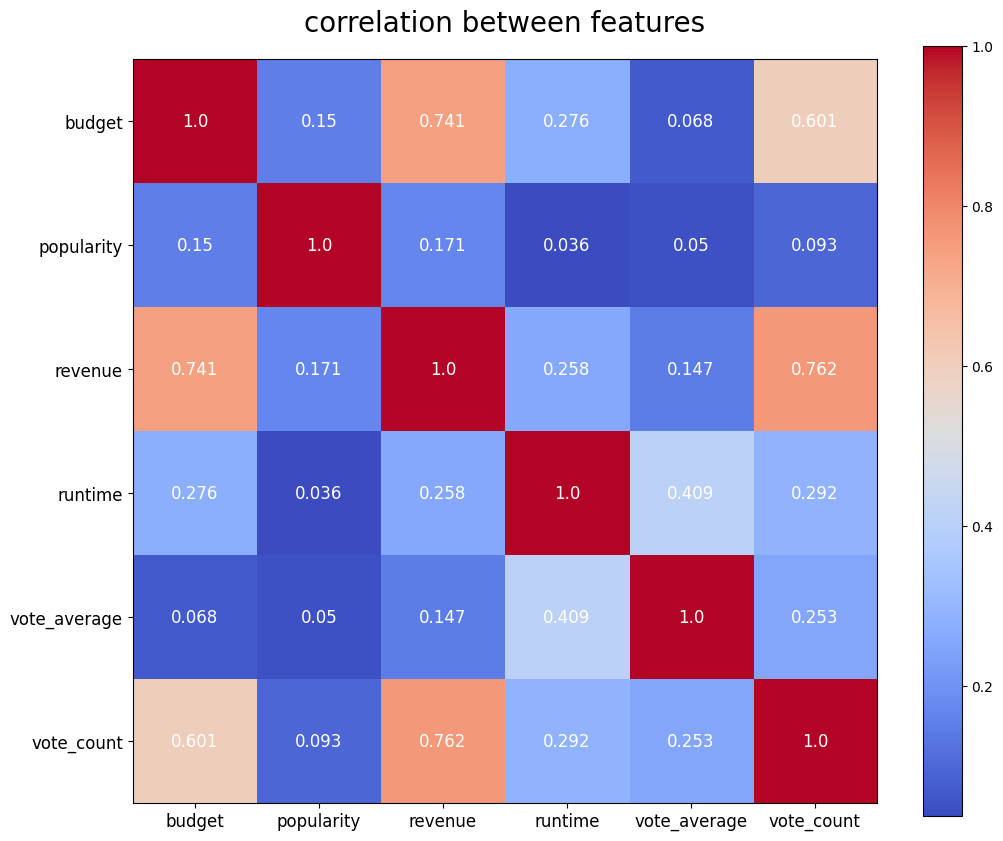

In [133]:
matrix = movies_df[["budget", "popularity", "revenue", "runtime", "vote_average", "vote_count"]].corr()

f, ax = plt.subplots(figsize=(12, 10))
plt.title("correlation between features", fontsize=20, pad=20)
plt.xticks(range(len(matrix.index)), matrix.index, fontsize=12)
plt.yticks(range(len(matrix.index)), matrix.index, fontsize=12)

# adding values
for i in range(len(matrix.index)):
    for j in range(len(matrix.index)):
        text = ax.text(j, i, round(matrix.iloc[i, j],3), ha="center", va="center", color="w", fontsize=12)

plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar();

# Data Preprocessing

In [134]:
#selecting the columns that are needed
movies_df = movies_df[['movie_id','title','overview','genres','keywords','cast','crew','vote_count','vote_average']]
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      10000 non-null  int64  
 1   title         10000 non-null  object 
 2   overview      9915 non-null   object 
 3   genres        10000 non-null  object 
 4   keywords      10000 non-null  object 
 5   cast          10000 non-null  object 
 6   crew          10000 non-null  object 
 7   vote_count    10000 non-null  int64  
 8   vote_average  10000 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


# Data Preprocessing

In [135]:
#checking the total sum of null values in the dataset
movies_df.isnull().sum()

movie_id         0
title            0
overview        85
genres           0
keywords         0
cast             0
crew             0
vote_count       0
vote_average     0
dtype: int64

# Data Cleaning

In [136]:
#dropping the null values
movies_df.dropna(inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9915 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      9915 non-null   int64  
 1   title         9915 non-null   object 
 2   overview      9915 non-null   object 
 3   genres        9915 non-null   object 
 4   keywords      9915 non-null   object 
 5   cast          9915 non-null   object 
 6   crew          9915 non-null   object 
 7   vote_count    9915 non-null   int64  
 8   vote_average  9915 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 774.6+ KB


# Data Cleaning

In [137]:
#checking for duplicates
movies_df.duplicated().sum()

movies_df.drop_duplicates(inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      8887 non-null   int64  
 1   title         8887 non-null   object 
 2   overview      8887 non-null   object 
 3   genres        8887 non-null   object 
 4   keywords      8887 non-null   object 
 5   cast          8887 non-null   object 
 6   crew          8887 non-null   object 
 7   vote_count    8887 non-null   int64  
 8   vote_average  8887 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 694.3+ KB


# Feature Engineering

In [138]:
movies_df.iloc[0].genres

"[{'id': 878, 'name': 'Science Fiction'}, {'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}]"

# Extracting the genres

In [139]:
#converting the string to list
import ast
def process(genre):
    final = []
    for i in ast.literal_eval(genre):
        final.append(i['name'])
    return final

In [140]:
movies_df['genres'] = movies_df['genres'].apply(process)

In [141]:

movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[Science Fiction, Adventure, Action]","[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[Mystery, Thriller, Comedy]","[{'id': 703, 'name': 'detective'}, {'id': 1200...","[{'adult': False, 'gender': 2, 'id': 8784, 'kn...","[{'adult': False, 'gender': 2, 'id': 1226, 'kn...",2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[Action, Comedy, Crime, Thriller]","[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'adult': False, 'gender': 2, 'id': 35029, 'k...","[{'adult': False, 'gender': 2, 'id': 6114, 'kn...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[Adventure, Family, Fantasy]","[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'adult': False, 'gender': 2, 'id': 5527, 'kn...","[{'adult': False, 'gender': 2, 'id': 1095, 'kn...",9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[Action, Fantasy, Science Fiction]","[{'id': 952, 'name': 'lightning'}, {'id': 2095...","[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 3687, 'kn...",3544,7.216
5,736526,Troll,"Deep inside the mountain of Dovre, something g...","[Fantasy, Action, Adventure]","[{'id': 1262, 'name': 'mountain'}, {'id': 5457...","[{'adult': False, 'gender': 1, 'id': 1394758, ...","[{'adult': False, 'gender': 2, 'id': 20308, 'k...",940,6.647
6,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",27566,7.558
7,536554,M3GAN,A brilliant toy company roboticist uses artifi...,"[Horror, Science Fiction, Thriller]","[{'id': 9707, 'name': 'evil doll'}, {'id': 123...","[{'adult': False, 'gender': 1, 'id': 1255540, ...","[{'adult': False, 'gender': 1, 'id': 494, 'kno...",91,7.110
8,668482,Roald Dahl's Matilda the Musical,An extraordinary young girl discovers her supe...,"[Family, Comedy, Fantasy]","[{'id': 291, 'name': 'circus'}, {'id': 295, 'n...","[{'adult': False, 'gender': 1, 'id': 2442117, ...","[{'adult': False, 'gender': 2, 'id': 463, 'kno...",255,6.822
9,740952,Savage Salvation,Newly engaged Shelby John and Ruby Red want a ...,"[Action, Thriller, Crime, Drama]","[{'id': 9748, 'name': 'revenge'}, {'id': 15593...","[{'adult': False, 'gender': 2, 'id': 54738, 'k...","[{'adult': False, 'gender': 2, 'id': 17210, 'k...",24,5.500


# Extracting the top 3 actors

In [142]:
#preprocessing the cast column
movies_df['cast'][0]

'[{\'adult\': False, \'gender\': 2, \'id\': 65731, \'known_for_department\': \'Acting\', \'name\': \'Sam Worthington\', \'original_name\': \'Sam Worthington\', \'popularity\': 91.673, \'profile_path\': \'/vM1WIfYQ1HUBtlVPwB9Hp9fLcn8.jpg\', \'cast_id\': 2, \'character\': \'Jake Sully\', \'credit_id\': \'52fe4943c3a368484e122b49\', \'order\': 0}, {\'adult\': False, \'gender\': 1, \'id\': 8691, \'known_for_department\': \'Acting\', \'name\': \'Zoe Saldaña\', \'original_name\': \'Zoe Saldaña\', \'popularity\': 114.9, \'profile_path\': \'/iOVbUH20il632nj2v01NCtYYeSg.jpg\', \'cast_id\': 3, \'character\': \'Neytiri\', \'credit_id\': \'52fe4943c3a368484e122b4d\', \'order\': 1}, {\'adult\': False, \'gender\': 1, \'id\': 10205, \'known_for_department\': \'Acting\', \'name\': \'Sigourney Weaver\', \'original_name\': \'Sigourney Weaver\', \'popularity\': 56.23, \'profile_path\': \'/flfhep27iBxseZIlxOMHt6zJFX1.jpg\', \'cast_id\': 4, \'character\': \'Kiri / Dr. Grace Augustine\', \'credit_id\': \'52

# Extracting the top 3 actors

In [143]:
#extracting the top 3 actors
def actors(cast):
    final = []
    count = 0
    for i in ast.literal_eval(cast):
        if count < 3:
            final.append(i['name'])
            count += 1
        else:
            break
    return final

In [144]:
movies_df['cast'] = movies_df['cast'].apply(actors)

In [145]:
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[Science Fiction, Adventure, Action]","[{'id': 697, 'name': 'loss of loved one'}, {'i...","[Sam Worthington, Zoe Saldaña, Sigourney Weaver]","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[Mystery, Thriller, Comedy]","[{'id': 703, 'name': 'detective'}, {'id': 1200...","[Daniel Craig, Edward Norton, Janelle Monáe]","[{'adult': False, 'gender': 2, 'id': 1226, 'kn...",2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[Action, Comedy, Crime, Thriller]","[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[David Harbour, John Leguizamo, Beverly D'Angelo]","[{'adult': False, 'gender': 2, 'id': 6114, 'kn...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[Adventure, Family, Fantasy]","[{'id': 83, 'name': 'saving the world'}, {'id'...","[Skandar Keynes, Georgie Henley, William Moseley]","[{'adult': False, 'gender': 2, 'id': 1095, 'kn...",9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[Action, Fantasy, Science Fiction]","[{'id': 952, 'name': 'lightning'}, {'id': 2095...","[Dwayne Johnson, Aldis Hodge, Noah Centineo]","[{'adult': False, 'gender': 2, 'id': 3687, 'kn...",3544,7.216
5,736526,Troll,"Deep inside the mountain of Dovre, something g...","[Fantasy, Action, Adventure]","[{'id': 1262, 'name': 'mountain'}, {'id': 5457...","[Ine Marie Wilmann, Kim S. Falck-Jørgensen, Ma...","[{'adult': False, 'gender': 2, 'id': 20308, 'k...",940,6.647
6,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[Sam Worthington, Zoe Saldaña, Sigourney Weaver]","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",27566,7.558
7,536554,M3GAN,A brilliant toy company roboticist uses artifi...,"[Horror, Science Fiction, Thriller]","[{'id': 9707, 'name': 'evil doll'}, {'id': 123...","[Allison Williams, Violet McGraw, Jenna Davis]","[{'adult': False, 'gender': 1, 'id': 494, 'kno...",91,7.110
8,668482,Roald Dahl's Matilda the Musical,An extraordinary young girl discovers her supe...,"[Family, Comedy, Fantasy]","[{'id': 291, 'name': 'circus'}, {'id': 295, 'n...","[Alisha Weir, Emma Thompson, Lashana Lynch]","[{'adult': False, 'gender': 2, 'id': 463, 'kno...",255,6.822
9,740952,Savage Salvation,Newly engaged Shelby John and Ruby Red want a ...,"[Action, Thriller, Crime, Drama]","[{'id': 9748, 'name': 'revenge'}, {'id': 15593...","[Jack Huston, Robert De Niro, John Malkovich]","[{'adult': False, 'gender': 2, 'id': 17210, 'k...",24,5.500


In [146]:
#convert keywords to return list of keywords
movies_df['keywords']=movies_df['keywords'].apply(process)
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[Science Fiction, Adventure, Action]","[loss of loved one, dying and death, alien lif...","[Sam Worthington, Zoe Saldaña, Sigourney Weaver]","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[Mystery, Thriller, Comedy]","[detective, greece, investigation, satire, seq...","[Daniel Craig, Edward Norton, Janelle Monáe]","[{'adult': False, 'gender': 2, 'id': 1226, 'kn...",2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[Action, Comedy, Crime, Thriller]","[holiday, santa claus, mercenary, saving chris...","[David Harbour, John Leguizamo, Beverly D'Angelo]","[{'adult': False, 'gender': 2, 'id': 6114, 'kn...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[Adventure, Family, Fantasy]","[saving the world, sibling relationship, witch...","[Skandar Keynes, Georgie Henley, William Moseley]","[{'adult': False, 'gender': 2, 'id': 1095, 'kn...",9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[Action, Fantasy, Science Fiction]","[lightning, anti hero, superhero, based on com...","[Dwayne Johnson, Aldis Hodge, Noah Centineo]","[{'adult': False, 'gender': 2, 'id': 3687, 'kn...",3544,7.216
5,736526,Troll,"Deep inside the mountain of Dovre, something g...","[Fantasy, Action, Adventure]","[mountain, mythical creature, creature, norweg...","[Ine Marie Wilmann, Kim S. Falck-Jørgensen, Ma...","[{'adult': False, 'gender': 2, 'id': 20308, 'k...",940,6.647
6,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldaña, Sigourney Weaver]","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",27566,7.558
7,536554,M3GAN,A brilliant toy company roboticist uses artifi...,"[Horror, Science Fiction, Thriller]","[evil doll, aunt niece relationship, orphan, c...","[Allison Williams, Violet McGraw, Jenna Davis]","[{'adult': False, 'gender': 1, 'id': 494, 'kno...",91,7.110
8,668482,Roald Dahl's Matilda the Musical,An extraordinary young girl discovers her supe...,"[Family, Comedy, Fantasy]","[circus, library, corruption, child abuse, mag...","[Alisha Weir, Emma Thompson, Lashana Lynch]","[{'adult': False, 'gender': 2, 'id': 463, 'kno...",255,6.822
9,740952,Savage Salvation,Newly engaged Shelby John and Ruby Red want a ...,"[Action, Thriller, Crime, Drama]","[revenge, recovering addict, police pursuit, o...","[Jack Huston, Robert De Niro, John Malkovich]","[{'adult': False, 'gender': 2, 'id': 17210, 'k...",24,5.500


In [147]:
#preprocessing the crew column
movies_df['crew'][0]

"[{'adult': False, 'gender': 2, 'id': 1721, 'known_for_department': 'Editing', 'name': 'Stephen E. Rivkin', 'original_name': 'Stephen E. Rivkin', 'popularity': 2.601, 'profile_path': '/804bmnoxrmlBYXGLh2ZOG7L8tfs.jpg', 'credit_id': '5b823c470e0a2645920229db', 'department': 'Editing', 'job': 'Editor'}, {'adult': False, 'gender': 2, 'id': 3718, 'known_for_department': 'Production', 'name': 'David Valdes', 'original_name': 'David Valdes', 'popularity': 6.065, 'profile_path': '/4gbCUGBWd4WeRsu9DeknpJUMlvz.jpg', 'credit_id': '62b43cdec2bcc60093b9ae7d', 'department': 'Production', 'job': 'Executive Producer'}, {'adult': False, 'gender': 2, 'id': 3718, 'known_for_department': 'Production', 'name': 'David Valdes', 'original_name': 'David Valdes', 'popularity': 6.065, 'profile_path': '/4gbCUGBWd4WeRsu9DeknpJUMlvz.jpg', 'credit_id': '638ffc07f10a1a009b76e143', 'department': 'Production', 'job': 'Unit Production Manager'}, {'adult': False, 'gender': 2, 'id': 507, 'known_for_department': 'Writing'

# Extracting the director

In [148]:
#extracting the director
def director(crew):
    final = []
    for i in ast.literal_eval(crew):
        if i['job'] == 'Director':
            final.append(i['name'])
            break
    return final

In [149]:
movies_df['crew'] = movies_df['crew'].apply(director)

In [150]:
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[Science Fiction, Adventure, Action]","[loss of loved one, dying and death, alien lif...","[Sam Worthington, Zoe Saldaña, Sigourney Weaver]",[James Cameron],3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[Mystery, Thriller, Comedy]","[detective, greece, investigation, satire, seq...","[Daniel Craig, Edward Norton, Janelle Monáe]",[Rian Johnson],2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[Action, Comedy, Crime, Thriller]","[holiday, santa claus, mercenary, saving chris...","[David Harbour, John Leguizamo, Beverly D'Angelo]",[Tommy Wirkola],805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[Adventure, Family, Fantasy]","[saving the world, sibling relationship, witch...","[Skandar Keynes, Georgie Henley, William Moseley]",[Andrew Adamson],9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[Action, Fantasy, Science Fiction]","[lightning, anti hero, superhero, based on com...","[Dwayne Johnson, Aldis Hodge, Noah Centineo]",[Jaume Collet-Serra],3544,7.216
5,736526,Troll,"Deep inside the mountain of Dovre, something g...","[Fantasy, Action, Adventure]","[mountain, mythical creature, creature, norweg...","[Ine Marie Wilmann, Kim S. Falck-Jørgensen, Ma...",[Roar Uthaug],940,6.647
6,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldaña, Sigourney Weaver]",[James Cameron],27566,7.558
7,536554,M3GAN,A brilliant toy company roboticist uses artifi...,"[Horror, Science Fiction, Thriller]","[evil doll, aunt niece relationship, orphan, c...","[Allison Williams, Violet McGraw, Jenna Davis]",[Gerard Johnstone],91,7.110
8,668482,Roald Dahl's Matilda the Musical,An extraordinary young girl discovers her supe...,"[Family, Comedy, Fantasy]","[circus, library, corruption, child abuse, mag...","[Alisha Weir, Emma Thompson, Lashana Lynch]",[Matthew Warchus],255,6.822
9,740952,Savage Salvation,Newly engaged Shelby John and Ruby Red want a ...,"[Action, Thriller, Crime, Drama]","[revenge, recovering addict, police pursuit, o...","[Jack Huston, Robert De Niro, John Malkovich]",[Randall Emmett],24,5.500


# Data Preprocessing

In [151]:
#overview is in string format so we will be converting it into list
movies_df['overview'] = movies_df['overview'].apply(lambda x:x.split())
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,"[Set, more, than, a, decade, after, the, event...","[Science Fiction, Adventure, Action]","[loss of loved one, dying and death, alien lif...","[Sam Worthington, Zoe Saldaña, Sigourney Weaver]",[James Cameron],3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,"[World-famous, detective, Benoit, Blanc, heads...","[Mystery, Thriller, Comedy]","[detective, greece, investigation, satire, seq...","[Daniel Craig, Edward Norton, Janelle Monáe]",[Rian Johnson],2204,7.083
2,899112,Violent Night,"[When, a, team, of, mercenaries, breaks, into,...","[Action, Comedy, Crime, Thriller]","[holiday, santa claus, mercenary, saving chris...","[David Harbour, John Leguizamo, Beverly D'Angelo]",[Tommy Wirkola],805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","[Siblings, Lucy,, Edmund,, Susan, and, Peter, ...","[Adventure, Family, Fantasy]","[saving the world, sibling relationship, witch...","[Skandar Keynes, Georgie Henley, William Moseley]",[Andrew Adamson],9108,7.108
4,436270,Black Adam,"[Nearly, 5,000, years, after, he, was, bestowe...","[Action, Fantasy, Science Fiction]","[lightning, anti hero, superhero, based on com...","[Dwayne Johnson, Aldis Hodge, Noah Centineo]",[Jaume Collet-Serra],3544,7.216
5,736526,Troll,"[Deep, inside, the, mountain, of, Dovre,, some...","[Fantasy, Action, Adventure]","[mountain, mythical creature, creature, norweg...","[Ine Marie Wilmann, Kim S. Falck-Jørgensen, Ma...",[Roar Uthaug],940,6.647
6,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldaña, Sigourney Weaver]",[James Cameron],27566,7.558
7,536554,M3GAN,"[A, brilliant, toy, company, roboticist, uses,...","[Horror, Science Fiction, Thriller]","[evil doll, aunt niece relationship, orphan, c...","[Allison Williams, Violet McGraw, Jenna Davis]",[Gerard Johnstone],91,7.110
8,668482,Roald Dahl's Matilda the Musical,"[An, extraordinary, young, girl, discovers, he...","[Family, Comedy, Fantasy]","[circus, library, corruption, child abuse, mag...","[Alisha Weir, Emma Thompson, Lashana Lynch]",[Matthew Warchus],255,6.822
9,740952,Savage Salvation,"[Newly, engaged, Shelby, John, and, Ruby, Red,...","[Action, Thriller, Crime, Drama]","[revenge, recovering addict, police pursuit, o...","[Jack Huston, Robert De Niro, John Malkovich]",[Randall Emmett],24,5.500


# Data Preprocessing

In [152]:
#removing spaces in between words
movies_df['genres'] = movies_df['genres'].apply(lambda x:[i.replace(" ", "") for i in x])

In [153]:
movies_df['cast'] = movies_df['cast'].apply(lambda x:[i.replace(" ", "") for i in x])

In [154]:
movies_df['crew'] = movies_df['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

In [155]:
movies_df['keywords'] = movies_df['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])

In [156]:
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,"[Set, more, than, a, decade, after, the, event...","[ScienceFiction, Adventure, Action]","[lossoflovedone, dyinganddeath, alienlife-form...","[SamWorthington, ZoeSaldaña, SigourneyWeaver]",[JamesCameron],3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,"[World-famous, detective, Benoit, Blanc, heads...","[Mystery, Thriller, Comedy]","[detective, greece, investigation, satire, seq...","[DanielCraig, EdwardNorton, JanelleMonáe]",[RianJohnson],2204,7.083
2,899112,Violent Night,"[When, a, team, of, mercenaries, breaks, into,...","[Action, Comedy, Crime, Thriller]","[holiday, santaclaus, mercenary, savingchristm...","[DavidHarbour, JohnLeguizamo, BeverlyD'Angelo]",[TommyWirkola],805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","[Siblings, Lucy,, Edmund,, Susan, and, Peter, ...","[Adventure, Family, Fantasy]","[savingtheworld, siblingrelationship, witch, b...","[SkandarKeynes, GeorgieHenley, WilliamMoseley]",[AndrewAdamson],9108,7.108
4,436270,Black Adam,"[Nearly, 5,000, years, after, he, was, bestowe...","[Action, Fantasy, ScienceFiction]","[lightning, antihero, superhero, basedoncomic,...","[DwayneJohnson, AldisHodge, NoahCentineo]",[JaumeCollet-Serra],3544,7.216
5,736526,Troll,"[Deep, inside, the, mountain, of, Dovre,, some...","[Fantasy, Action, Adventure]","[mountain, mythicalcreature, creature, norwegi...","[IneMarieWilmann, KimS.Falck-Jørgensen, MadsSj...",[RoarUthaug],940,6.647
6,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldaña, SigourneyWeaver]",[JamesCameron],27566,7.558
7,536554,M3GAN,"[A, brilliant, toy, company, roboticist, uses,...","[Horror, ScienceFiction, Thriller]","[evildoll, auntniecerelationship, orphan, cara...","[AllisonWilliams, VioletMcGraw, JennaDavis]",[GerardJohnstone],91,7.110
8,668482,Roald Dahl's Matilda the Musical,"[An, extraordinary, young, girl, discovers, he...","[Family, Comedy, Fantasy]","[circus, library, corruption, childabuse, magi...","[AlishaWeir, EmmaThompson, LashanaLynch]",[MatthewWarchus],255,6.822
9,740952,Savage Salvation,"[Newly, engaged, Shelby, John, and, Ruby, Red,...","[Action, Thriller, Crime, Drama]","[revenge, recoveringaddict, policepursuit, opi...","[JackHuston, RobertDeNiro, JohnMalkovich]",[RandallEmmett],24,5.500


# Data visualization

In [157]:
#plotting the genres
genres = movies_df['genres'].apply(pd.Series).stack().reset_index(drop=True)
genres.value_counts()


C:\Users\dagbo\AppData\Local\Temp\ipykernel_20108\1233724639.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genres = movies_df['genres'].apply(pd.Series).stack().reset_index(drop=True)


Drama             3410
Comedy            2680
Action            2443
Thriller          2257
Adventure         1640
Romance           1418
Horror            1309
Animation         1277
Family            1247
Fantasy           1213
Crime             1164
ScienceFiction    1106
Mystery            748
History            367
War                258
Music              253
Documentary        169
TVMovie            169
Western            128
dtype: int64

<AxesSubplot: >

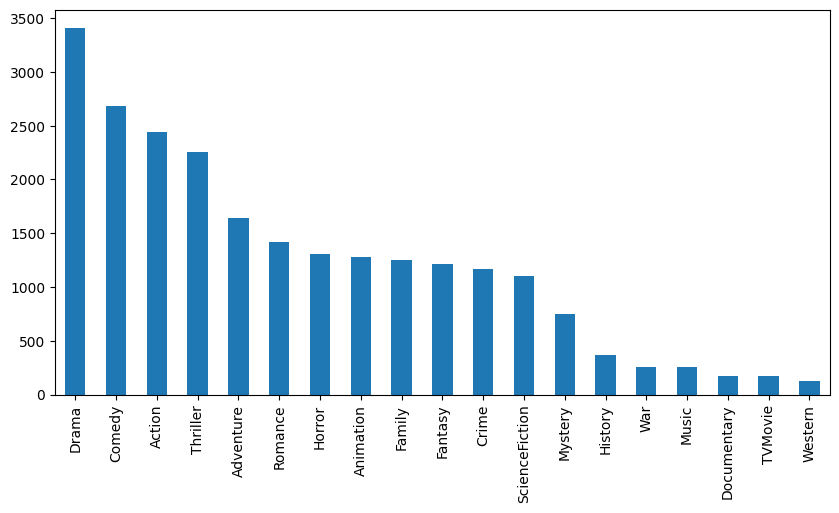

In [158]:
genres.value_counts().plot(kind='bar',figsize=(10,5))


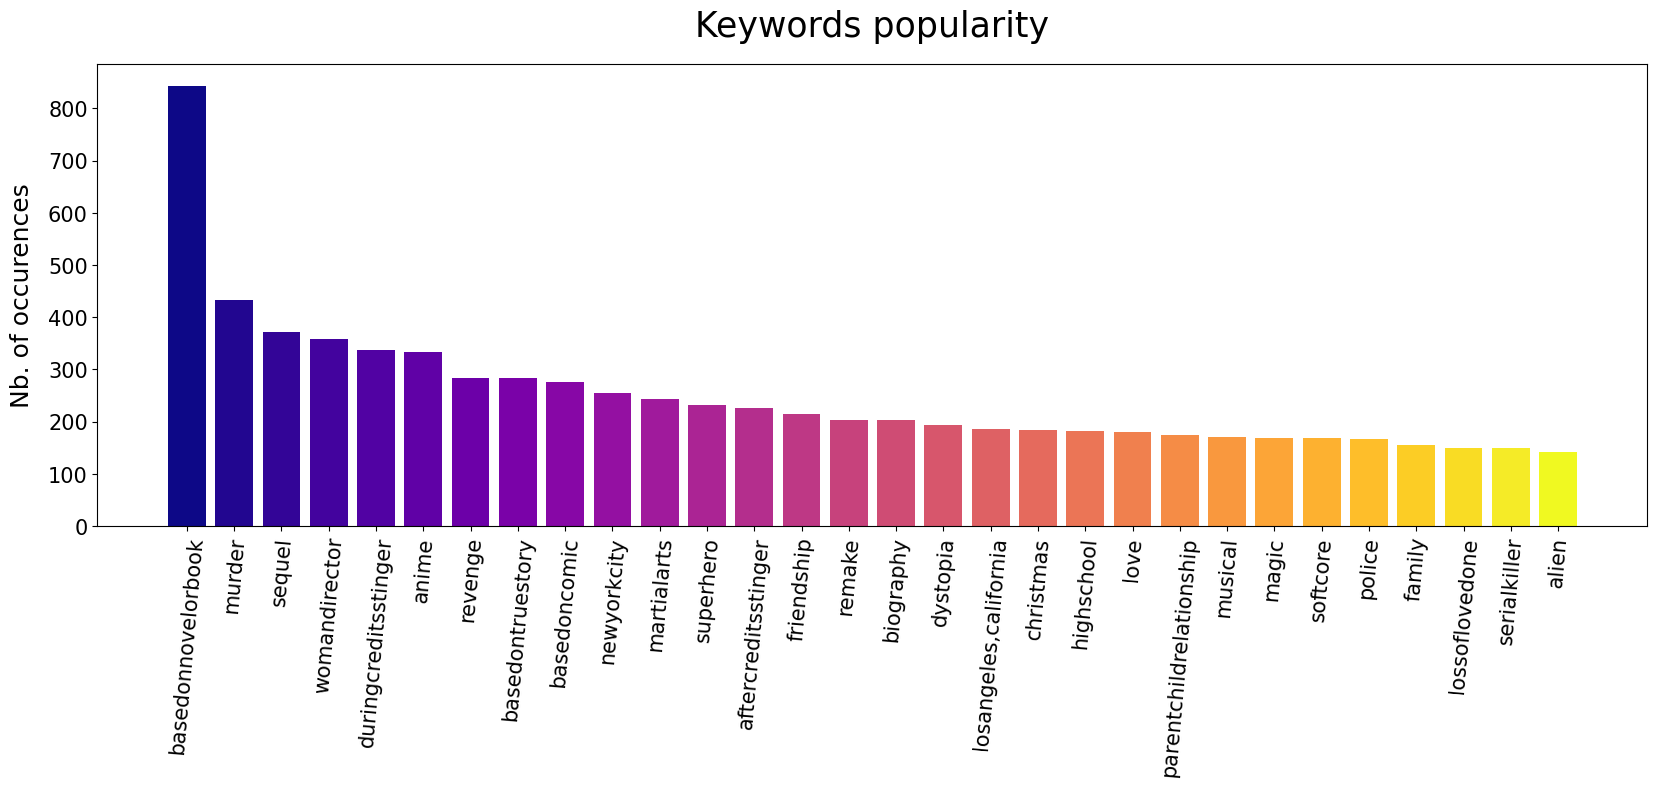

In [159]:
from collections import defaultdict, Counter
# Set the number of top keywords to display
top_keywords_num = 30

# Flatten the list of lists of keywords into a single list
keywords_flatten = sum(movies_df["keywords"].values, [])

# Count the frequency of each keyword
keywords_info = Counter(keywords_flatten)

# Get the top `top_keywords_num` keywords and store them in a dictionary
top_keywords = dict(keywords_info.most_common(top_keywords_num))

# Plot the frequency of the top keywords using a bar plot
plt.figure(figsize=(20, 6))
plt.xticks(rotation=85, fontsize=15)  # rotate the x-axis labels by 85 degrees and set the font size to 15
plt.yticks(fontsize=15)  # set the font size of y-axis labels to 15
plt.ylabel("Nb. of occurences", fontsize=18, labelpad=10)  # set the y-axis label, font size, and label padding
plt.bar(top_keywords.keys(), top_keywords.values(), align='center', color=plt.cm.get_cmap('plasma',
                                                                                          top_keywords_num).colors)  # plot the bar plot with the keyword names on x-axis and the frequency on y-axis
plt.title("Keywords popularity", fontsize=25, pad=20)  # set the title of the plot with font size 25 and padding 20
plt.show()  # display the plot

# CREATING A METADATA COLUMN WITH ALL THE TAGS OF THE MOVIES

In [160]:
#creating a metadata column with all the tags of the movies
movies_df['metadata'] = movies_df['overview'] + movies_df['genres'] + movies_df['keywords'] + movies_df['cast'] + movies_df['crew']

In [161]:
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average,metadata
0,76600,Avatar: The Way of Water,"[Set, more, than, a, decade, after, the, event...","[ScienceFiction, Adventure, Action]","[lossoflovedone, dyinganddeath, alienlife-form...","[SamWorthington, ZoeSaldaña, SigourneyWeaver]",[JamesCameron],3655,7.711,"[Set, more, than, a, decade, after, the, event..."
1,661374,Glass Onion: A Knives Out Mystery,"[World-famous, detective, Benoit, Blanc, heads...","[Mystery, Thriller, Comedy]","[detective, greece, investigation, satire, seq...","[DanielCraig, EdwardNorton, JanelleMonáe]",[RianJohnson],2204,7.083,"[World-famous, detective, Benoit, Blanc, heads..."
2,899112,Violent Night,"[When, a, team, of, mercenaries, breaks, into,...","[Action, Comedy, Crime, Thriller]","[holiday, santaclaus, mercenary, savingchristm...","[DavidHarbour, JohnLeguizamo, BeverlyD'Angelo]",[TommyWirkola],805,7.742,"[When, a, team, of, mercenaries, breaks, into,..."
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","[Siblings, Lucy,, Edmund,, Susan, and, Peter, ...","[Adventure, Family, Fantasy]","[savingtheworld, siblingrelationship, witch, b...","[SkandarKeynes, GeorgieHenley, WilliamMoseley]",[AndrewAdamson],9108,7.108,"[Siblings, Lucy,, Edmund,, Susan, and, Peter, ..."
4,436270,Black Adam,"[Nearly, 5,000, years, after, he, was, bestowe...","[Action, Fantasy, ScienceFiction]","[lightning, antihero, superhero, basedoncomic,...","[DwayneJohnson, AldisHodge, NoahCentineo]",[JaumeCollet-Serra],3544,7.216,"[Nearly, 5,000, years, after, he, was, bestowe..."
5,736526,Troll,"[Deep, inside, the, mountain, of, Dovre,, some...","[Fantasy, Action, Adventure]","[mountain, mythicalcreature, creature, norwegi...","[IneMarieWilmann, KimS.Falck-Jørgensen, MadsSj...",[RoarUthaug],940,6.647,"[Deep, inside, the, mountain, of, Dovre,, some..."
6,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldaña, SigourneyWeaver]",[JamesCameron],27566,7.558,"[In, the, 22nd, century,, a, paraplegic, Marin..."
7,536554,M3GAN,"[A, brilliant, toy, company, roboticist, uses,...","[Horror, ScienceFiction, Thriller]","[evildoll, auntniecerelationship, orphan, cara...","[AllisonWilliams, VioletMcGraw, JennaDavis]",[GerardJohnstone],91,7.110,"[A, brilliant, toy, company, roboticist, uses,..."
8,668482,Roald Dahl's Matilda the Musical,"[An, extraordinary, young, girl, discovers, he...","[Family, Comedy, Fantasy]","[circus, library, corruption, childabuse, magi...","[AlishaWeir, EmmaThompson, LashanaLynch]",[MatthewWarchus],255,6.822,"[An, extraordinary, young, girl, discovers, he..."
9,740952,Savage Salvation,"[Newly, engaged, Shelby, John, and, Ruby, Red,...","[Action, Thriller, Crime, Drama]","[revenge, recoveringaddict, policepursuit, opi...","[JackHuston, RobertDeNiro, JohnMalkovich]",[RandallEmmett],24,5.500,"[Newly, engaged, Shelby, John, and, Ruby, Red,..."


In [162]:
#create a new df
movies_df_new = movies_df[['movie_id','title','metadata']]

In [163]:
movies_df_new.head(10)

,movie_id,title,metadata
0,76600,Avatar: The Way of Water,"[Set, more, than, a, decade, after, the, event..."
1,661374,Glass Onion: A Knives Out Mystery,"[World-famous, detective, Benoit, Blanc, heads..."
2,899112,Violent Night,"[When, a, team, of, mercenaries, breaks, into,..."
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","[Siblings, Lucy,, Edmund,, Susan, and, Peter, ..."
4,436270,Black Adam,"[Nearly, 5,000, years, after, he, was, bestowe..."
5,736526,Troll,"[Deep, inside, the, mountain, of, Dovre,, some..."
6,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
7,536554,M3GAN,"[A, brilliant, toy, company, roboticist, uses,..."
8,668482,Roald Dahl's Matilda the Musical,"[An, extraordinary, young, girl, discovers, he..."
9,740952,Savage Salvation,"[Newly, engaged, Shelby, John, and, Ruby, Red,..."


In [164]:
movies_df_new

,movie_id,title,metadata
0,76600,Avatar: The Way of Water,"[Set, more, than, a, decade, after, the, event..."
1,661374,Glass Onion: A Knives Out Mystery,"[World-famous, detective, Benoit, Blanc, heads..."
2,899112,Violent Night,"[When, a, team, of, mercenaries, breaks, into,..."
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","[Siblings, Lucy,, Edmund,, Susan, and, Peter, ..."
4,436270,Black Adam,"[Nearly, 5,000, years, after, he, was, bestowe..."
...,...,...,...
9990,667969,Birds of Paradise,"[Two, dancers, at, an, elite, ballet, academy,..."
9994,736820,Confidential Assignment 2: International,"[Follows, Rim, Chul, Ryung, heading, back, to,..."
9996,354861,Father Figures,"[Upon, learning, that, their, mother, has, bee..."
9997,17687,The Public Enemy,"[Two, young, Chicago, hoodlums,, Tom, Powers, ..."


In [165]:
#convert the metadata column to string
movies_df_new['metadata'] = movies_df_new['metadata'].apply(lambda x:" ".join(x))

C:\Users\dagbo\AppData\Local\Temp\ipykernel_20108\2802191564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_new['metadata'] = movies_df_new['metadata'].apply(lambda x:" ".join(x))


In [166]:
movies_df_new.head(10)

,movie_id,title,metadata
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th..."
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ..."
5,736526,Troll,"Deep inside the mountain of Dovre, something g..."
6,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
7,536554,M3GAN,A brilliant toy company roboticist uses artifi...
8,668482,Roald Dahl's Matilda the Musical,An extraordinary young girl discovers her supe...
9,740952,Savage Salvation,Newly engaged Shelby John and Ruby Red want a ...


In [167]:
movies_df_new['metadata'][0]

'Set more than a decade after the events of the first film, learn the story of the Sully family (Jake, Neytiri, and their kids), the trouble that follows them, the lengths they go to keep each other safe, the battles they fight to stay alive, and the tragedies they endure. ScienceFiction Adventure Action lossoflovedone dyinganddeath alienlife-form resurrection sequel dysfunctionalfamily alienplanet distantfuture adoptedchild rebirth familydynamics adoptedson strongervillain SamWorthington ZoeSaldaña SigourneyWeaver JamesCameron'

In [ ]:
# Cleaning Texts

In [168]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dagbo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [171]:
#cleaning the metadata column
corpus = []
for i in movies_df_new['metadata']:
    #removing all the special characters
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()

    #splitting the words
    review = review.split()

    #stemming the words
    ps = PorterStemmer()
    all_words = stopwords.words('english')
    all_words.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_words)]
    review = ' '.join(review)
    corpus.append(review)

In [172]:
print(corpus)

['set decad event first film learn stori sulli famili jake neytiri kid troubl follow length go keep safe battl fight stay aliv tragedi endur sciencefict adventur action lossoflovedon dyinganddeath alienlif form resurrect sequel dysfunctionalfamili alienplanet distantfutur adoptedchild rebirth familydynam adoptedson strongervillain samworthington zoesalda sigourneyweav jamescameron', 'world famou detect benoit blanc head greec peel back layer mysteri surround tech billionair eclect crew friend mysteri thriller comedi detect greec investig satir sequel murder mysteri billionair whodunit puzzlebox clue identicaltwin murdermysteri arresteddevelop covid danielcraig edwardnorton janellemon e rianjohnson', 'team mercenari break wealthi famili compound christma eve take everyon insid hostag team prepar surpris combat santa clau ground show nick saint action comedi crime thriller holiday santaclau mercenari savingchristma boobytrap duringcreditssting christma davidharbour johnleguizamo beverlyd

In [179]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
X = cv.fit_transform(corpus).toarray()

MemoryError: Unable to allocate 339. MiB for an array with shape (8887, 5000) and data type int64